In [41]:
import json
import warnings
from itertools import combinations
from pathlib import Path

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay, accuracy_score, confusion_matrix, log_loss,
    precision_score, roc_auc_score, roc_curve,
)
from sklearn.metrics._classification import UndefinedMetricWarning
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tqdm
from sklearn import preprocessing
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px

warnings.filterwarnings('ignore')

In [42]:
plt.style.use('ggplot')

In [43]:
df = pd.read_csv('./ref/employee_attrition_previous_closure.csv')

In [44]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  50.0        No      Travel_Rarely     1126.0  Research & Development   
1  36.0        No      Travel_Rarely      216.0  Research & Development   
2  21.0       Yes      Travel_Rarely      337.0                   Sales   
3  50.0        No  Travel_Frequently     1246.0         Human Resources   
4  52.0        No      Travel_Rarely      994.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0          2        Medical              1             997   
1               6.0          2        Medical              1             178   
2               7.0          1      Marketing              1            1780   
3               NaN          3        Medical              1             644   
4               7.0          4  Life Sciences              1            1118   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         3            80                 1   
1  ...                         4            80                 2   
2  ...                         2            80                 0   
3  ...                         3            80                 1   
4  ...                         4            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 32                      1               2               5   
1                  7                      0               3               3   
2                  1                      3               3               1   
3                 32                      2               3              32   
4                 18                      4               3               8   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        1                     3  
1                  2                        0                     1  
2                  0                        1                     0  
3                  5                       10                     7  
4                  6                        4                     0  

[5 rows x 35 columns]

## 1. Data Pre-processing

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [46]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0  50.0        No      Travel_Rarely     1126.0  Research & Development   
1  36.0        No      Travel_Rarely      216.0  Research & Development   
2  21.0       Yes      Travel_Rarely      337.0                   Sales   
3  50.0        No  Travel_Frequently     1246.0         Human Resources   
4  52.0        No      Travel_Rarely      994.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0          2        Medical              1             997   
1               6.0          2        Medical              1             178   
2               7.0          1      Marketing              1            1780   
3               NaN          3        Medical              1             644   
4               7.0          4  Life Sciences              1            1118   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         3            80                 1   
1  ...                         4            80                 2   
2  ...                         2            80                 0   
3  ...                         3            80                 1   
4  ...                         4            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 32                      1               2               5   
1                  7                      0               3               3   
2                  1                      3               3               1   
3                 32                      2               3              32   
4                 18                      4               3               8   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        1                     3  
1                  2                        0                     1  
2                  0                        1                     0  
3                  5                       10                     7  
4                  6                        4                     0  

[5 rows x 35 columns]

In [47]:
df.isna().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [48]:
df['Age'].unique()

array([50., 36., 21., 52., 33., 47., 22., nan, 40., 27., 55., 37., 34.,
       46., 38., 30., 24., 53., 32., 23., 51., 42., 20., 29., 43., 44.,
       58., 45., 56., 39., 54., 48., 31., 49., 41., 19., 57., 60., 59.,
       18.])

In [49]:
df['DistanceFromHome'].unique()

array([ 1.,  6.,  7., nan, 15.,  4.,  2., 16., 25., 14., 26., 27., 10.,
       12., 24., 29.,  9., 23.,  8., 18., 13., 28., 21., 11., 17., 22.,
       19., 20.])

In [50]:
# Drop the missing columns
df = df.dropna()
df

Age Attrition BusinessTravel  DailyRate              Department  \
0     50.0        No  Travel_Rarely     1126.0  Research & Development   
1     36.0        No  Travel_Rarely      216.0  Research & Development   
2     21.0       Yes  Travel_Rarely      337.0                   Sales   
4     52.0        No  Travel_Rarely      994.0  Research & Development   
5     33.0       Yes  Travel_Rarely     1277.0  Research & Development   
...    ...       ...            ...        ...                     ...   
1020  41.0        No  Travel_Rarely     1276.0                   Sales   
1021  33.0        No     Non-Travel      750.0                   Sales   
1023  33.0        No  Travel_Rarely      589.0  Research & Development   
1027  29.0        No  Travel_Rarely     1378.0  Research & Development   
1028  50.0        No  Travel_Rarely      264.0                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                  1.0          2        Medical              1   
1                  6.0          2        Medical              1   
2                  7.0          1      Marketing              1   
4                  7.0          4  Life Sciences              1   
5                 15.0          1        Medical              1   
...                ...        ...            ...            ...   
1020               2.0          5  Life Sciences              1   
1021              22.0          2      Marketing              1   
1023              28.0          4  Life Sciences              1   
1027              13.0          2          Other              1   
1028               9.0          3      Marketing              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                997  ...                         3            80   
1                178  ...                         4            80   
2               1780  ...                         2            80   
4               1118  ...                         4            80   
5                582  ...                         4            80   
...              ...  ...                       ...           ...   
1020             625  ...                         2            80   
1021             160  ...                         1            80   
1023            1549  ...                         2            80   
1027            2053  ...                         1            80   
1028            1591  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    1                 32                      1   
1                    2                  7                      0   
2                    0                  1                      3   
4                    0                 18                      4   
5                    0                 15                      2   
...                ...                ...                    ...   
1020                 1                 22                      2   
1021                 1                  8                      2   
1023                 1                 15                      3   
1027                 1                 10                      2   
1028                 1                 27                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  2               5                  4   
1                  3               3                  2   
2                  3               1                  0   
4                  3               8                  6   
5                  4               7                  6   
...              ...             ...                ...   
1020               3              18                 16   
1021               4               7                  7   
1023               3              15                 14   
1027               3               4                  3   
1028              

In [51]:
dups = df.duplicated() #checks each row of the dataset and returns TRUE or FALSE depending on whether it is a duplicate
print(dups.any()) #returns TRUE if there is any value in dups that is equal to TRUE
print(df[dups]) #returns the problematic row

False
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [52]:
# Check the count of values in each column
df.nunique()

Age                          39
Attrition                     2
BusinessTravel                3
DailyRate                   589
Department                    3
DistanceFromHome             27
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber              775
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               743
MonthlyRate                 766
NumCompaniesWorked           10
Over18                        1
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
WorkLifeBalance               4
YearsAtC

In [53]:
# Drop columns that have only one value and the coumn Employee Number
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [54]:
df

Age Attrition BusinessTravel  DailyRate              Department  \
0     50.0        No  Travel_Rarely     1126.0  Research & Development   
1     36.0        No  Travel_Rarely      216.0  Research & Development   
2     21.0       Yes  Travel_Rarely      337.0                   Sales   
4     52.0        No  Travel_Rarely      994.0  Research & Development   
5     33.0       Yes  Travel_Rarely     1277.0  Research & Development   
...    ...       ...            ...        ...                     ...   
1020  41.0        No  Travel_Rarely     1276.0                   Sales   
1021  33.0        No     Non-Travel      750.0                   Sales   
1023  33.0        No  Travel_Rarely      589.0  Research & Development   
1027  29.0        No  Travel_Rarely     1378.0  Research & Development   
1028  50.0        No  Travel_Rarely      264.0                   Sales   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                  1.0          2        Medical                        4   
1                  6.0          2        Medical                        2   
2                  7.0          1      Marketing                        2   
4                  7.0          4  Life Sciences                        2   
5                 15.0          1        Medical                        2   
...                ...        ...            ...                      ...   
1020               2.0          5  Life Sciences                        2   
1021              22.0          2      Marketing                        3   
1023              28.0          4  Life Sciences                        2   
1027              13.0          2          Other                        4   
1028               9.0          3      Marketing                        3   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0       Male  ...                  4                         3   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
4       Male  ...                  3                         4   
5       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1020  Female  ...                  3                         2   
1021    Male  ...                  3                         1   
1023    Male  ...                  3                         2   
1027    Male  ...                  3                         1   
1028    Male  ...                  3                         3   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    1                32                      1   
1                    2                 7                      0   
2                    0                 1                      3   
4                    0                18                      4   
5                    0                15                      2   
...                ...               ...                    ...   
1020                 1                22                      2   
1021                 1                 8                      2   
1023                 1                15                      3   
1027                 1                10                      2   
1028                 1                27                      2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  2               5                   4   
1                  3               3                   2   
2                  3               1                   0   
4                  3               8                   6   
5                  4               7                   6   
...              ...             ...                 ...   
1020               3              18                  16   
1021               4               7                   7   
1023               3              15                  1

## 2. Distribution of Attrition statuses

In [55]:
df.query('Attrition == "Yes"')

Age Attrition     BusinessTravel  DailyRate              Department  \
2     21.0       Yes      Travel_Rarely      337.0                   Sales   
5     33.0       Yes      Travel_Rarely     1277.0  Research & Development   
14    33.0       Yes      Travel_Rarely     1017.0  Research & Development   
15    37.0       Yes      Travel_Rarely      625.0                   Sales   
33    23.0       Yes      Travel_Rarely     1243.0  Research & Development   
...    ...       ...                ...        ...                     ...   
1000  36.0       Yes      Travel_Rarely     1218.0                   Sales   
1007  30.0       Yes  Travel_Frequently      464.0  Research & Development   
1012  29.0       Yes  Travel_Frequently      459.0  Research & Development   
1014  24.0       Yes      Travel_Rarely      984.0  Research & Development   
1016  53.0       Yes      Travel_Rarely     1168.0                   Sales   

      DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
2                  7.0          1         Marketing                        2   
5                 15.0          1           Medical                        2   
14                25.0          3           Medical                        1   
15                 1.0          4     Life Sciences                        1   
33                 6.0          3     Life Sciences                        3   
...                ...        ...               ...                      ...   
1000               9.0          4     Life Sciences                        3   
1007               4.0          3  Technical Degree                        3   
1012              24.0          2     Life Sciences                        4   
1014              17.0          2     Life Sciences                        4   
1016              24.0          4     Life Sciences                        1   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
2       Male  ...                  3                         2   
5       Male  ...                  3                         4   
14      Male  ...                  4                         2   
15      Male  ...                  3                         3   
33      Male  ...                  4                         3   
...      ...  ...                ...                       ...   
1000    Male  ...                  4                         2   
1007    Male  ...                  4                         3   
1012    Male  ...                  4                         2   
1014  Female  ...                  3                         1   
1016    Male  ...                  3                         2   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
2                    0                 1                      3   
5                    0                15                      2   
14                   0                 5                      0   
15                   0                17                      2   
33                   2                 1                      2   
...                ...               ...                    ...   
1000                 0                10                      4   
1007                 0                 3                      4   
1012                 0                 1                      3   
1014                 1                 1                      3   
1016                 0                15                      2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
2                  3               1                   0   
5                  4               7                   6   
14                 3               2                   2   
15                 1              14                   1   
33                 3               0                   0   
...              ...             ...                 ...   
1000               3               5                   3   
1007               3           

In [56]:
df.query('Attrition == "No"')

Age Attrition BusinessTravel  DailyRate              Department  \
0     50.0        No  Travel_Rarely     1126.0  Research & Development   
1     36.0        No  Travel_Rarely      216.0  Research & Development   
4     52.0        No  Travel_Rarely      994.0  Research & Development   
6     47.0        No  Travel_Rarely     1001.0  Research & Development   
7     22.0        No  Travel_Rarely     1230.0  Research & Development   
...    ...       ...            ...        ...                     ...   
1020  41.0        No  Travel_Rarely     1276.0                   Sales   
1021  33.0        No     Non-Travel      750.0                   Sales   
1023  33.0        No  Travel_Rarely      589.0  Research & Development   
1027  29.0        No  Travel_Rarely     1378.0  Research & Development   
1028  50.0        No  Travel_Rarely      264.0                   Sales   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                  1.0          2        Medical                        4   
1                  6.0          2        Medical                        2   
4                  7.0          4  Life Sciences                        2   
6                  4.0          3  Life Sciences                        3   
7                  1.0          2  Life Sciences                        4   
...                ...        ...            ...                      ...   
1020               2.0          5  Life Sciences                        2   
1021              22.0          2      Marketing                        3   
1023              28.0          4  Life Sciences                        2   
1027              13.0          2          Other                        4   
1028               9.0          3      Marketing                        3   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0       Male  ...                  4                         3   
1       Male  ...                  4                         4   
4       Male  ...                  3                         4   
6     Female  ...                  3                         3   
7       Male  ...                  4                         1   
...      ...  ...                ...                       ...   
1020  Female  ...                  3                         2   
1021    Male  ...                  3                         1   
1023    Male  ...                  3                         2   
1027    Male  ...                  3                         1   
1028    Male  ...                  3                         3   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    1                32                      1   
1                    2                 7                      0   
4                    0                18                      4   
6                    1                28                      4   
7                    2                 4                      2   
...                ...               ...                    ...   
1020                 1                22                      2   
1021                 1                 8                      2   
1023                 1                15                      3   
1027                 1                10                      2   
1028                 1                27                      2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  2               5                   4   
1                  3               3                   2   
4                  3               8                   6   
6                  3              22                  11   
7                  1               2                   2   
...              ...             ...                 ...   
1020               3              18                  16   
1021               4               7                   7   
1023               3              15                  1

In [57]:
# Calculate the proportions of Attrition
attrition = df[(df['Attrition'] != "Yes")]
no_attrition = df[(df['Attrition'] == "No")]

trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [58]:
# sns.pairplot(df, hue="Attrition")

# Features distribution (hue = Attrition)

In [59]:
# One hot encoding column Attrition
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [60]:
df

Age  Attrition BusinessTravel  DailyRate              Department  \
0     50.0          0  Travel_Rarely     1126.0  Research & Development   
1     36.0          0  Travel_Rarely      216.0  Research & Development   
2     21.0          1  Travel_Rarely      337.0                   Sales   
4     52.0          0  Travel_Rarely      994.0  Research & Development   
5     33.0          1  Travel_Rarely     1277.0  Research & Development   
...    ...        ...            ...        ...                     ...   
1020  41.0          0  Travel_Rarely     1276.0                   Sales   
1021  33.0          0     Non-Travel      750.0                   Sales   
1023  33.0          0  Travel_Rarely      589.0  Research & Development   
1027  29.0          0  Travel_Rarely     1378.0  Research & Development   
1028  50.0          0  Travel_Rarely      264.0                   Sales   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                  1.0          2        Medical                        4   
1                  6.0          2        Medical                        2   
2                  7.0          1      Marketing                        2   
4                  7.0          4  Life Sciences                        2   
5                 15.0          1        Medical                        2   
...                ...        ...            ...                      ...   
1020               2.0          5  Life Sciences                        2   
1021              22.0          2      Marketing                        3   
1023              28.0          4  Life Sciences                        2   
1027              13.0          2          Other                        4   
1028               9.0          3      Marketing                        3   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0       Male  ...                  4                         3   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
4       Male  ...                  3                         4   
5       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1020  Female  ...                  3                         2   
1021    Male  ...                  3                         1   
1023    Male  ...                  3                         2   
1027    Male  ...                  3                         1   
1028    Male  ...                  3                         3   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    1                32                      1   
1                    2                 7                      0   
2                    0                 1                      3   
4                    0                18                      4   
5                    0                15                      2   
...                ...               ...                    ...   
1020                 1                22                      2   
1021                 1                 8                      2   
1023                 1                15                      3   
1027                 1                10                      2   
1028                 1                27                      2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  2               5                   4   
1                  3               3                   2   
2                  3               1                   0   
4                  3               8                   6   
5                  4               7                   6   
...              ...             ...                 ...   
1020               3              18                  16   
1021               4               7                   7   
1023               3              15       

In [61]:
def barplot(var_select, x_no_numeric) :
    tmp1 = df[(df['Attrition'] != 0)]
    tmp2 = df[(df['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[var_select],df['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [62]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = df['Attrition'].corr(df[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [63]:
plot_distribution('Age', False)
barplot('Age', False)
plot_distribution('DailyRate', 100)
plot_distribution('DistanceFromHome', False)
barplot('DistanceFromHome', False)
plot_distribution('HourlyRate', False)
plot_distribution('MonthlyIncome', 100)
plot_distribution('MonthlyRate', 100)
plot_distribution('NumCompaniesWorked', False)
barplot('NumCompaniesWorked',False)
plot_distribution('PercentSalaryHike', False)
barplot('PercentSalaryHike', False) 
plot_distribution('TotalWorkingYears', False)
barplot('TotalWorkingYears', False)
plot_distribution('TrainingTimesLastYear', False)
barplot('TrainingTimesLastYear',False)
plot_distribution('YearsAtCompany', False)
barplot('YearsAtCompany', False)
plot_distribution('YearsInCurrentRole', False)
barplot('YearsInCurrentRole', False)
plot_distribution('YearsSinceLastPromotion', False)
barplot('YearsSinceLastPromotion', False)
plot_distribution('YearsWithCurrManager', False)
barplot('YearsWithCurrManager', False)

In [64]:
def plot_pie(var_select) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [65]:
plot_pie("Gender")
barplot('Gender',True)
plot_pie('OverTime')
barplot('OverTime',True)
plot_pie('BusinessTravel')
barplot('BusinessTravel',True)
plot_pie('JobRole')
barplot('JobRole',True)
plot_pie('Department') 
barplot('Department',True)
plot_pie('MaritalStatus') 
barplot('MaritalStatus',True)
plot_pie('EducationField') 
barplot('EducationField',True)
plot_pie('Education') 
barplot('Education',False)
plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)
plot_pie('JobInvolvement')
barplot('JobInvolvement', False)
plot_pie('JobLevel')
barplot('JobLevel',False)
plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)
plot_pie('PerformanceRating')
barplot('PerformanceRating',False)
plot_pie('RelationshipSatisfaction')
barplot('RelationshipSatisfaction', False)
plot_pie('StockOptionLevel')
barplot('StockOptionLevel', False)
plot_pie('WorkLifeBalance')
barplot('WorkLifeBalance', False)

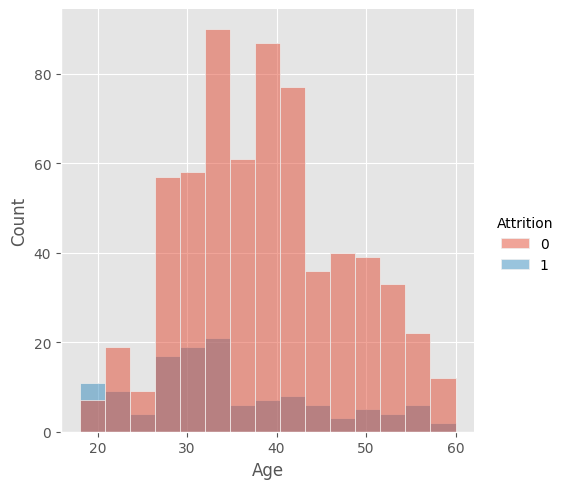

In [66]:
sns.displot(df, x = 'Age', hue = 'Attrition')

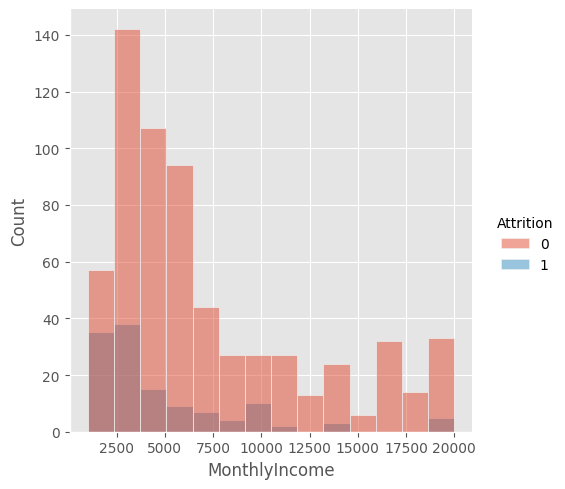

In [67]:
sns.displot(df, x = 'MonthlyIncome', hue = 'Attrition')

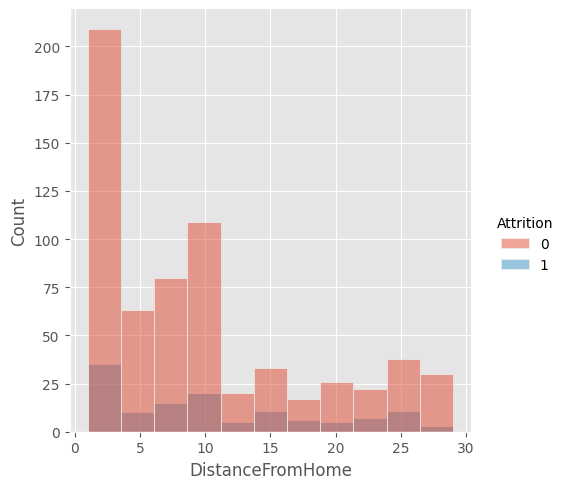

In [68]:
sns.displot(df, x = 'DistanceFromHome', hue = 'Attrition')

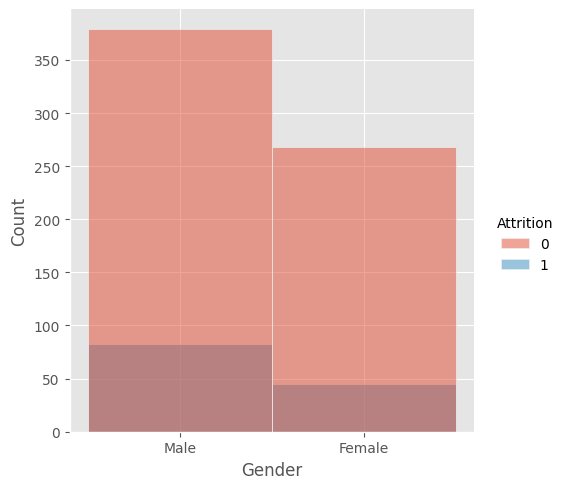

In [69]:
sns.displot(df, x = 'Gender', hue = 'Attrition')

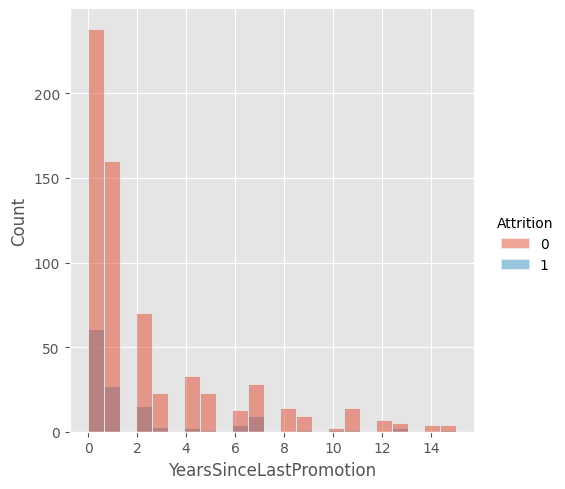

In [70]:
sns.displot(df, x = 'YearsSinceLastPromotion', hue = 'Attrition')

# Data transformation

In [39]:
# Check for variables with skew above 0.75
df=df.copy()
skew_limit = 0.75
skew_vals = df.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

display(skew_cols.style.set_caption('Columns to be log-transformed:'))

# Log-transform skewed variables
for i in skew_cols.index.values:
    df[i] = df[i].apply(np.log1p)

## 2. Correlation matrix

/var/folders/4c/6jy3z6sn7zg_n_24fwj6v_xw0000gn/T/ipykernel_24428/3780277067.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})


<AxesSubplot:>

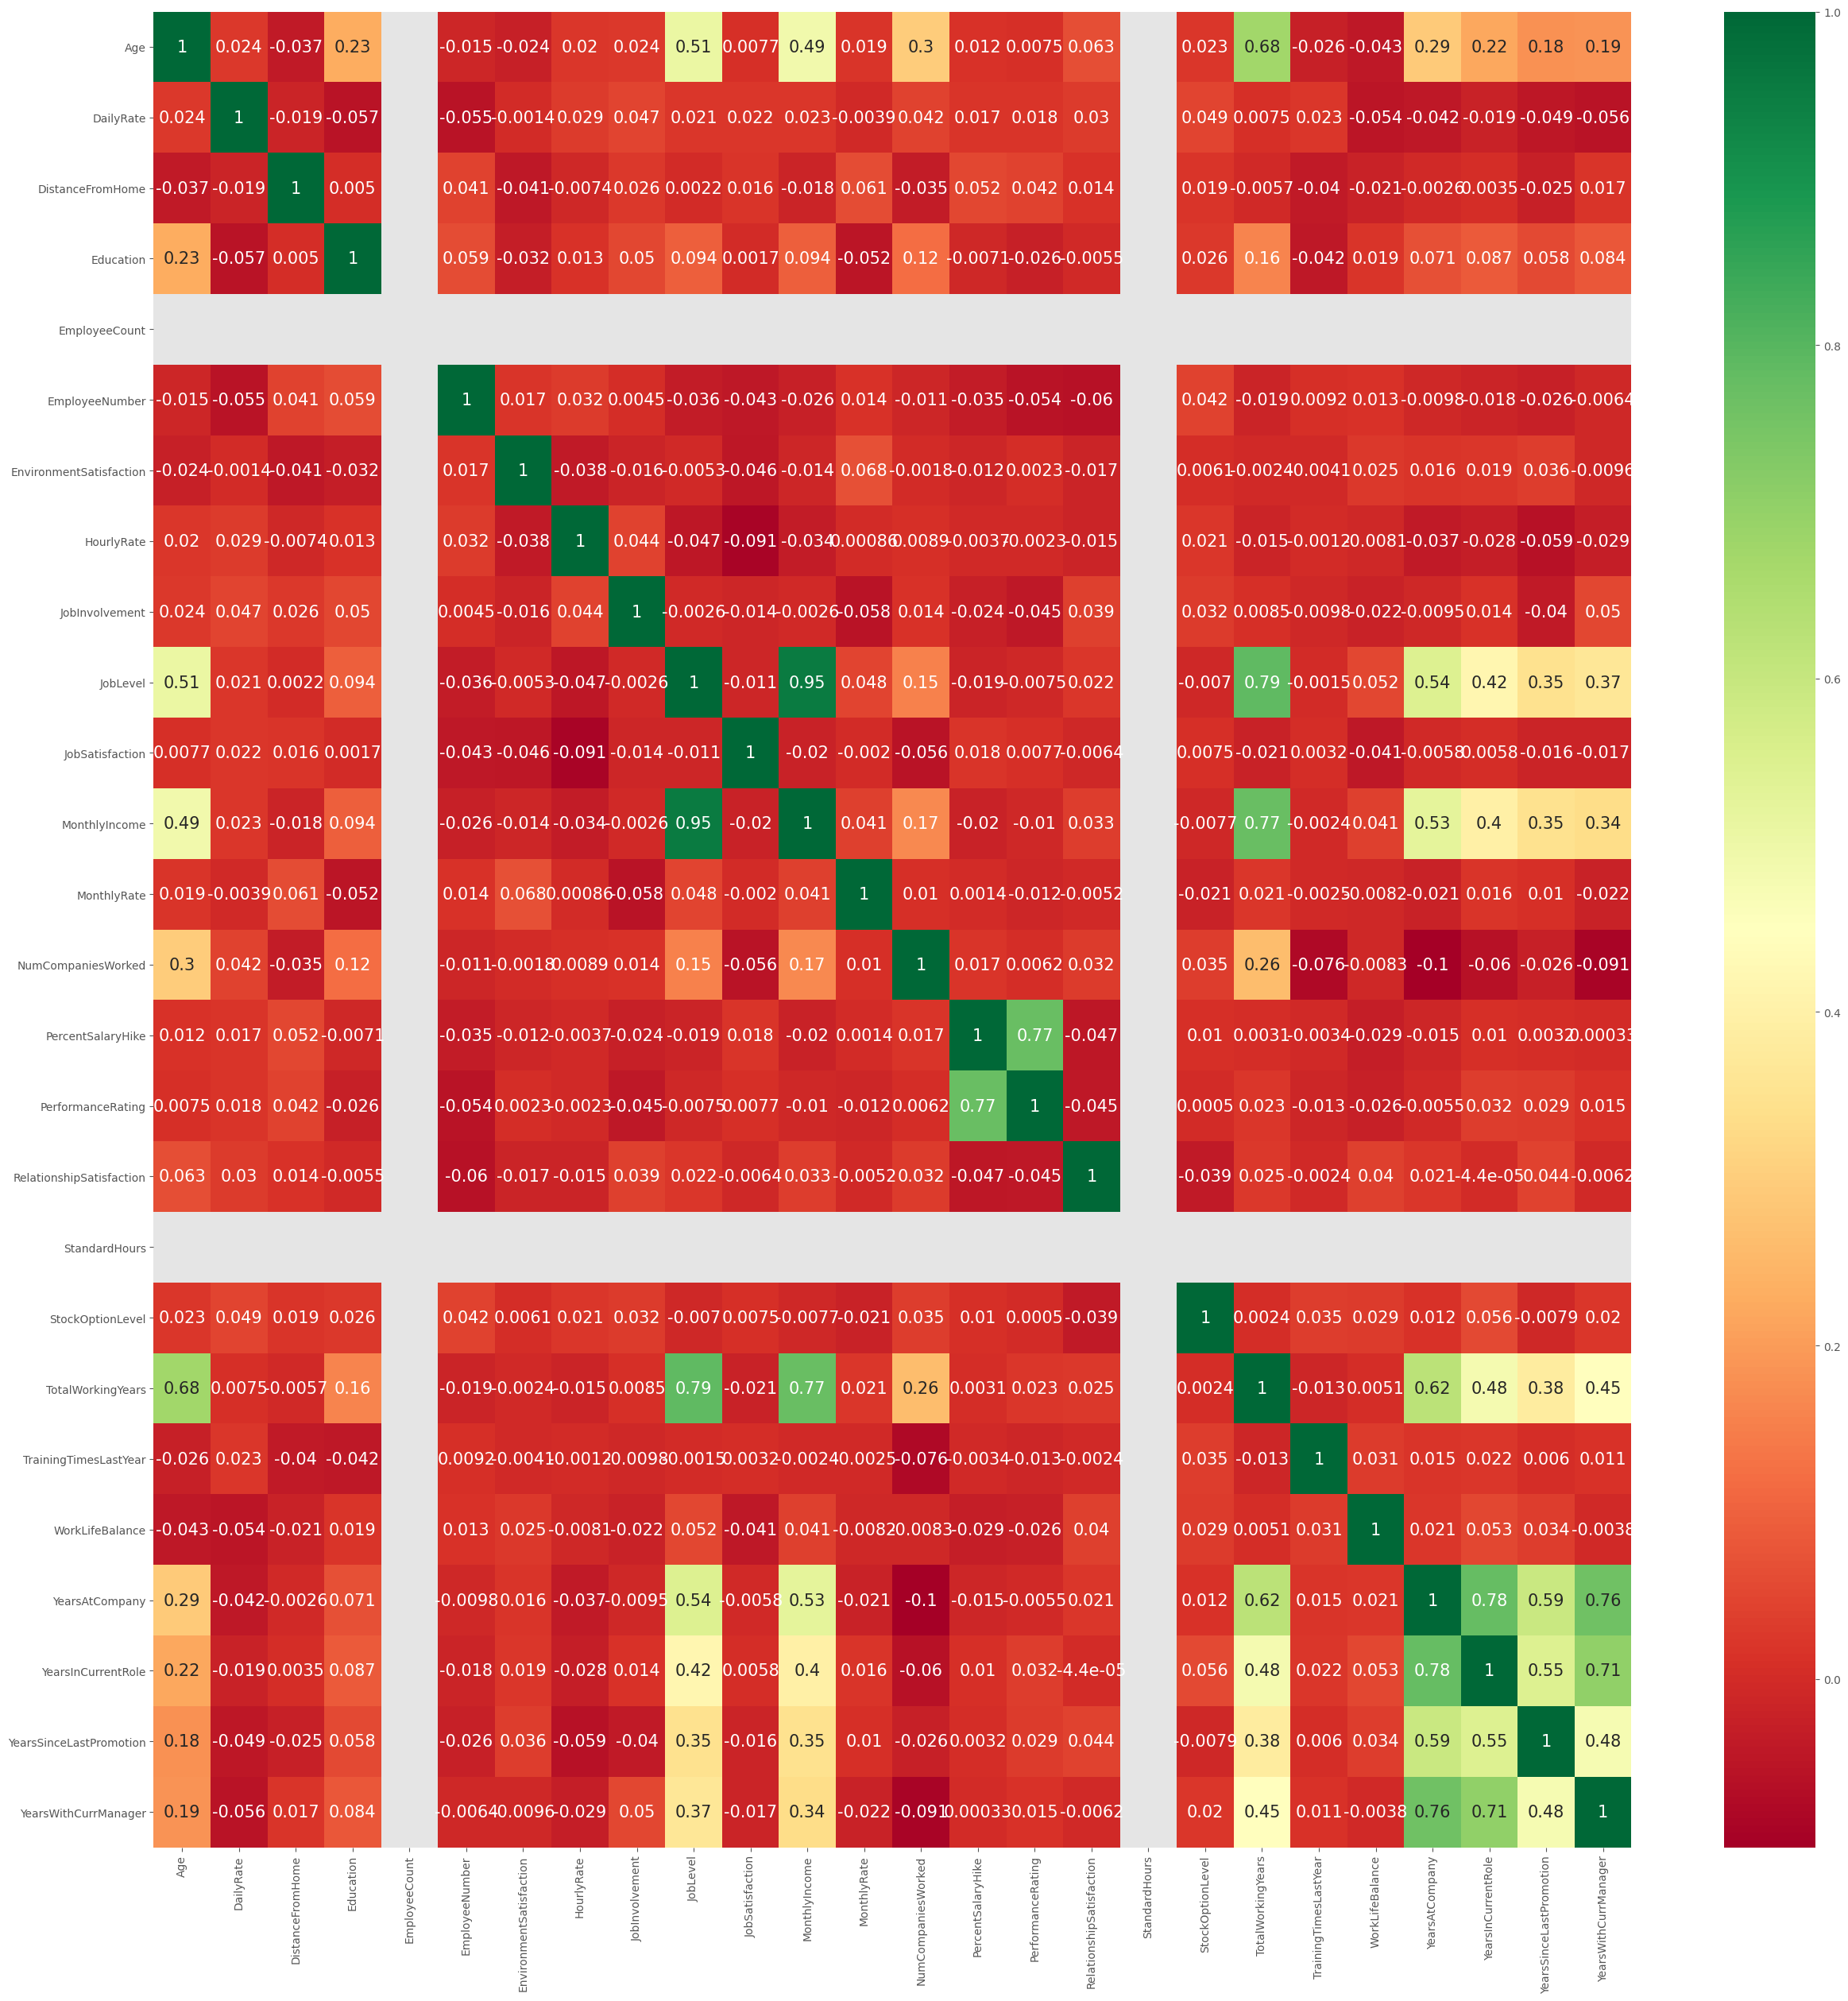

In [29]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# High Correlations:
    Age & Total working years: 0.68
    Job level & Monthly income: 0.95
    Job level & Total Working years: 0.79
    Monthly income & Total Working years: 0.77
    Percent Salary Hike & Performance Rating: 0.77
    Total Working Years & Years at Company: 0.62
    Years at Company & Years in Current Role: 0.78
    Years at Company & Years since last Promotion: 0.59
    Years At Company & Years with Current Manager: 0.76
    Years in Current Role & Years since Last Promotion: 0.55
    Years in Current Role & Years with Current Manager: 0.71
    
    